**Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset**

In [1]:
#Import Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Fetch Dataset
df=pd.read_csv("/content/sales_data_with_discounts.csv")

In [3]:
#Read Dataset
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
#Check for null values
df.isnull().sum()

,0
Date,0
Day,0
SKU,0
City,0
Volume,0
BU,0
Brand,0
Model,0
Avg Price,0
Total Sales Value,0


Dataset doesn't have any null values.

In [5]:
#learn the shape of object types of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               450 non-null    object 
 1   Day                450 non-null    object 
 2   SKU                450 non-null    object 
 3   City               450 non-null    object 
 4   Volume             450 non-null    int64  
 5   BU                 450 non-null    object 
 6   Brand              450 non-null    object 
 7   Model              450 non-null    object 
 8   Avg Price          450 non-null    int64  
 9   Total Sales Value  450 non-null    int64  
 10  Discount Rate (%)  450 non-null    float64
 11  Discount Amount    450 non-null    float64
 12  Net Sales Value    450 non-null    float64
dtypes: float64(3), int64(3), object(7)
memory usage: 45.8+ KB


**Data Types of columns:**

1]Numerical:
 Volume, Avg Price, Total Sales Value, Discount Rate (%), Discount Amount,Net Sales Value

2]Categorical:
BU, Brand, Model

3]Mixed:
 Date, Day, City, SKU

Check unique values of object datatype columns

In [6]:
df["SKU"].unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'F01', 'F02', 'F03', 'F04', 'F05', 'F06', 'F07', 'F08',
       'F09', 'F10', 'L01', 'L02', 'L03', 'L04', 'L05', 'L06', 'L07',
       'L08', 'L09', 'L10'], dtype=object)

In [7]:
df["BU"].unique()

array(['Mobiles', 'FMCG', 'Lifestyle'], dtype=object)

In [8]:
df["Brand"].unique()

array(['RealU', 'YouM', 'Sumsang', 'Orange', 'Babaji', 'Vedic', 'Gear',
       'Jeera', 'Viva'], dtype=object)

In [9]:
df["Model"].unique()

array(['RU-10', 'RU-9 Plus', 'YM-99', 'YM-99 Plus', 'YM-98 ', 'RU-9',
       'S-20', 'S-21', 'O-10', 'O-11', 'Babaji Oil ', 'Vedic Cream',
       'Vedic Shampoo', 'Babaji Shampoo', 'Babaji Cream', 'Vedic Oil',
       'Gear Oil', 'Gear Cream', 'Gear Shampoo', 'Gear BB Cream',
       'M- T Shirts', 'M- Inners', 'W-Casuals', 'W-Inners', 'M-Jeans',
       'M-Casuals', 'W-Western', 'W-Lounge', 'M-Formals', 'M-Shoes'],
      dtype=object)

**Descriptive Analytics for Numerical Columns**
'Volume',' Avg Price ', 'Total Sales Value',Discount Rate (%), Discount Amount,Net Sales Value.

In [10]:
#summary statistics for numerical columns in our DataFrame.
df.describe()

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
count,450.000000,450.000000,450.000000,450.000000,450.000000,450.000000
mean,5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131
std,4.231602,18079.904840,50535.074173,4.220602,4509.902963,46358.656624
min,1.000000,290.000000,400.000000,5.007822,69.177942,326.974801
25%,3.000000,465.000000,2700.000000,13.965063,460.459304,2202.208645
50%,4.000000,1450.000000,5700.000000,16.577766,988.933733,4677.788059
75%,6.000000,10100.000000,53200.000000,18.114718,5316.495427,47847.912852
max,31.000000,60100.000000,196400.000000,19.992407,25738.022194,179507.479049


In [11]:
x=np.mean(df['Volume'])
print(x)

5.066666666666666


In [12]:
x=np.median(df['Volume'])
print(x)

4.0


In [13]:
x=np.std(df['Volume'])
print(x)

4.226897995772632


In [14]:
x=stats.mode(df['Volume'])
print(x)

ModeResult(mode=3, count=110)


In [15]:
x=stats.mode(df['Avg Price'])
print(x)

ModeResult(mode=400, count=30)


In [16]:
x=stats.mode(df['Total Sales Value'])
print(x)

ModeResult(mode=24300, count=14)


In [17]:
x=stats.mode(df['Discount Rate (%)'])
print(x)

ModeResult(mode=5.007822189204133, count=1)


In [18]:
x=stats.mode(df['Discount Amount'])
print(x)

ModeResult(mode=69.17794228822787, count=1)


In [19]:
x=stats.mode(df['Net Sales Value'])
print(x)

ModeResult(mode=326.97480055470817, count=1)


**Basic statistical measures for numerical columns**

In [20]:
Basic_statistics= {
    "Columns":[ "Volume"," Avg Price",	"Total Sales Value"," Discount Rate (%)", "Discount Amount", "Net Sales Value"],
    "Mean": [5.066667,10453.433333,33812.835556,15.155242,3346.499424,30466.336131],
    "Std": [4.231602,	18079.904840	,50535.074173	,4.220602,	4509.902963	,46358.656624],
    "Median": [4.000000,	1450.000000	,5700.000000	,16.577766	,988.933733,	4677.788059],
    "Mode":[3, 400, 24300, 5.007822189204133, 69.17794228822787, 326.97480055470817]
    }

df1=pd.DataFrame(Basic_statistics)
print(df1)

              Columns          Mean           Std       Median          Mode
0              Volume      5.066667      4.231602     4.000000      3.000000
1           Avg Price  10453.433333  18079.904840  1450.000000    400.000000
2   Total Sales Value  33812.835556  50535.074173  5700.000000  24300.000000
3   Discount Rate (%)     15.155242      4.220602    16.577766      5.007822
4     Discount Amount   3346.499424   4509.902963   988.933733     69.177942
5     Net Sales Value  30466.336131  46358.656624  4677.788059    326.974801


**Data Visualization**

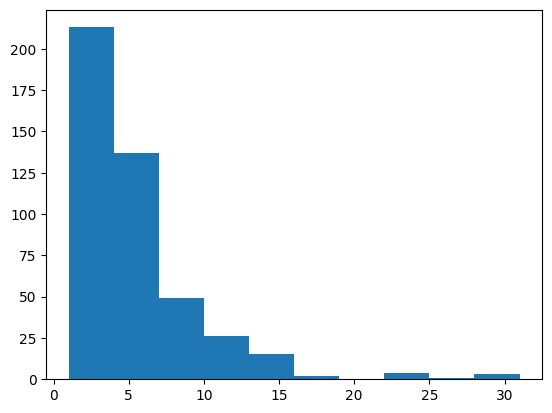

In [21]:
# Histograms
plt.hist(df['Volume'])
plt.show()

From histogram, we can say that most of the datapoints are between '0' to '10'.

In [22]:
#Skewness
df['Volume'].skew()

2.731723626557714

We can say that data is positively skewed for this data column.

<Axes: ylabel='Density'>

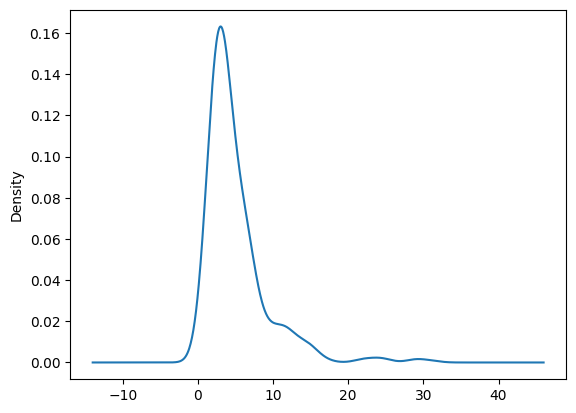

In [23]:
#KDE Plot
df["Volume"].plot(kind='kde')

KDE plots shows the density of those points along the value range, making it easier to understand the distribution of the data.

<Axes: xlabel='Volume', ylabel='Count'>

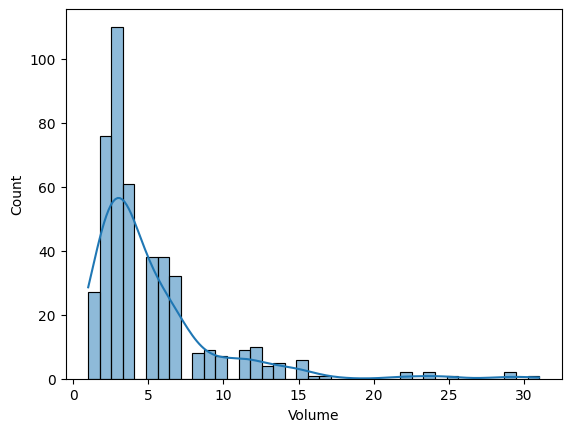

In [24]:
sns.histplot(df['Volume'], kde=True)

Above histplot shows the data distribution.

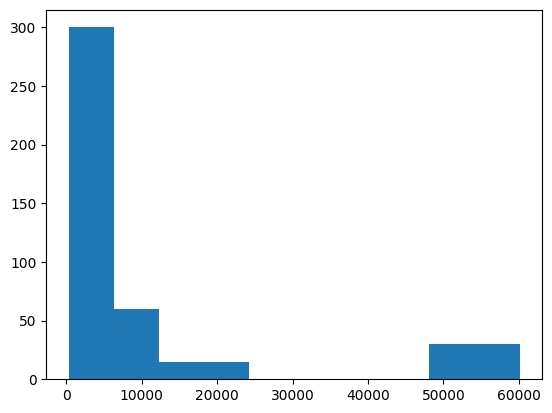

In [25]:
plt.hist(df['Avg Price'])
plt.show()

In [26]:
df['Avg Price'].skew()

1.9088730767759727

<Axes: ylabel='Density'>

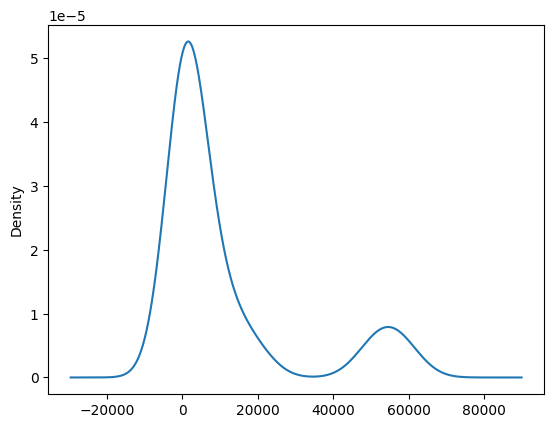

In [27]:
df['Avg Price'].plot(kind='kde')

<Axes: xlabel='Avg Price', ylabel='Count'>

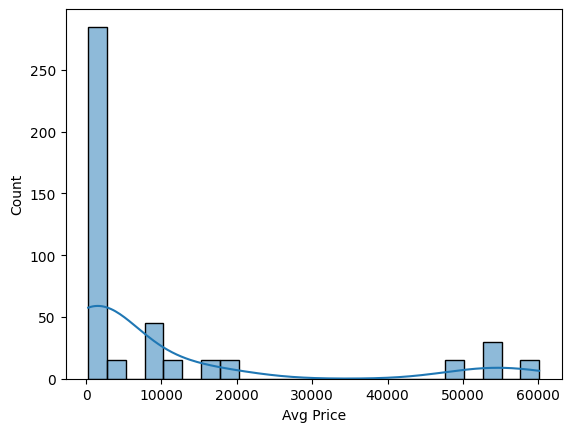

In [28]:
sns.histplot(df['Avg Price'], kde=True)

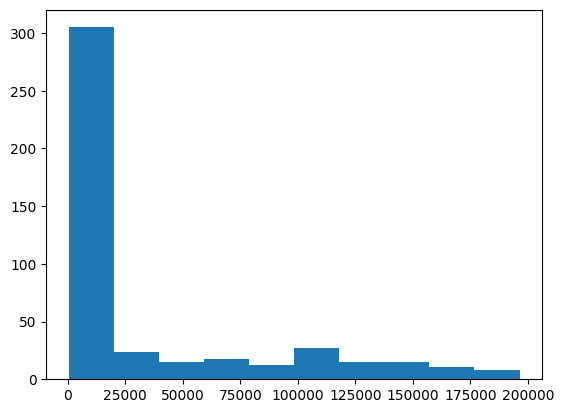

In [29]:
plt.hist(df['Total Sales Value'])
plt.show()

In [30]:
df['Total Sales Value'].skew()

1.5347293238977937

<Axes: ylabel='Density'>

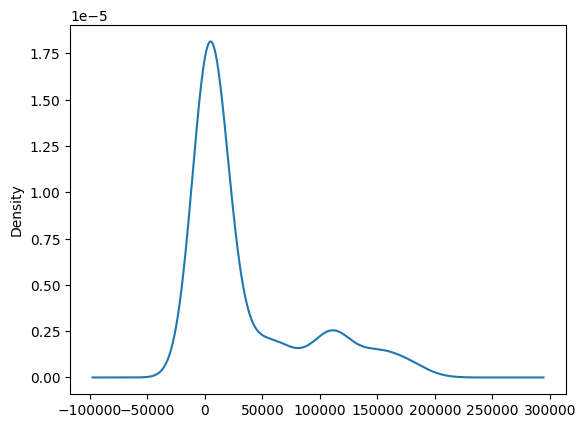

In [31]:
df['Total Sales Value'].plot(kind='kde')

<Axes: xlabel='Total Sales Value', ylabel='Count'>

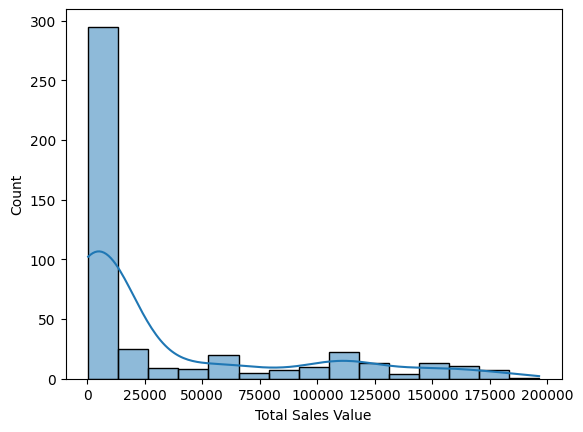

In [32]:
sns.histplot(df['Total Sales Value'],kde=True)

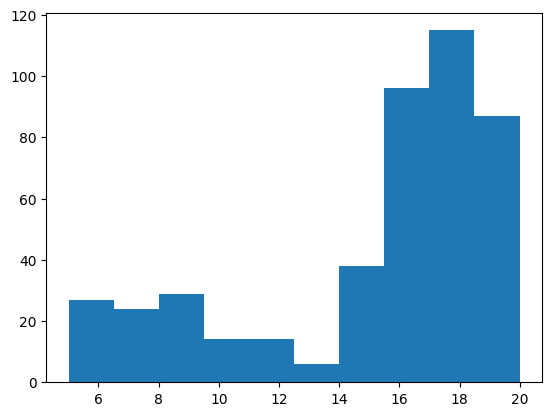

In [33]:
plt.hist(df['Discount Rate (%)'])
plt.show()

In [34]:
df['Discount Rate (%)'].skew()

-1.0622943696988825

<Axes: ylabel='Density'>

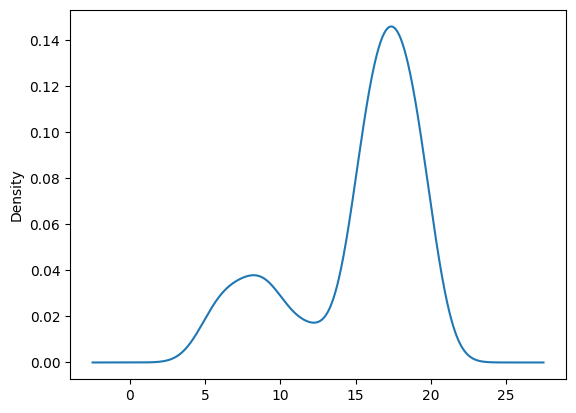

In [35]:
df['Discount Rate (%)'].plot(kind='kde')

<Axes: xlabel='Discount Rate (%)', ylabel='Count'>

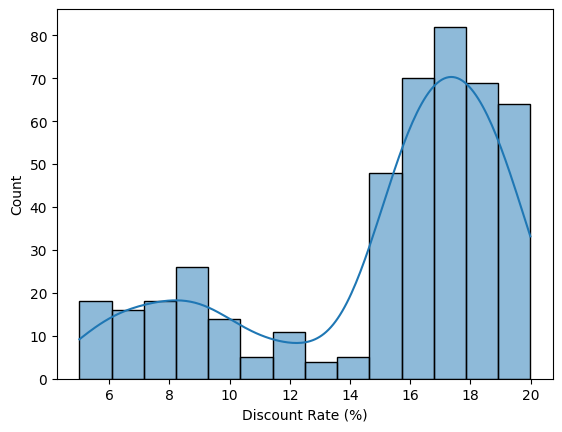

In [36]:
sns.histplot(df['Discount Rate (%)'], kde=True)

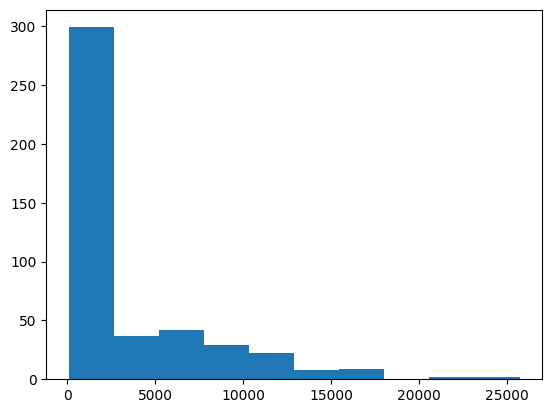

In [37]:
plt.hist(df['Discount Amount'])
plt.show()

In [38]:
df['Discount Amount'].skew()

1.9130377339538271

<Axes: ylabel='Density'>

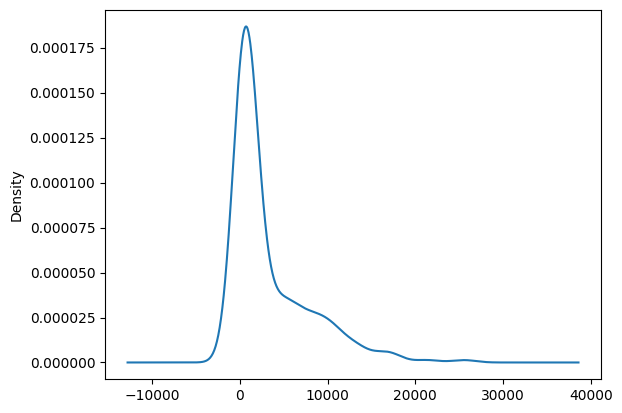

In [39]:
df['Discount Amount'].plot(kind='kde')

<Axes: xlabel='Discount Amount', ylabel='Count'>

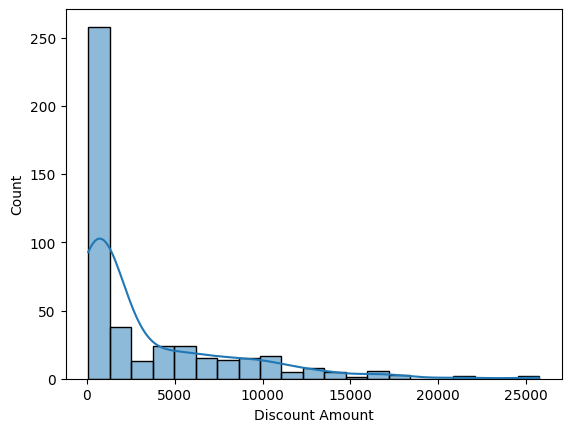

In [40]:
sns.histplot(df['Discount Amount'],kde=True)

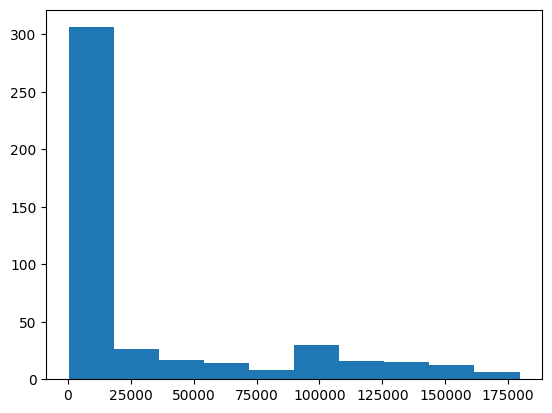

In [41]:
plt.hist(df['Net Sales Value'])
plt.show()

In [42]:
df['Net Sales Value'].skew()

1.5408217575344376

<Axes: ylabel='Density'>

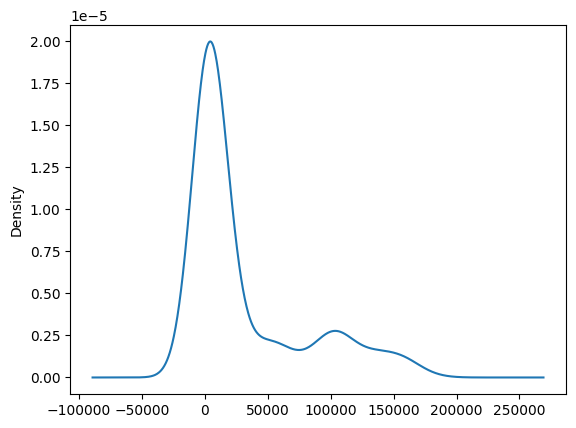

In [43]:
df['Net Sales Value'].plot(kind='kde')

<Axes: xlabel='Net Sales Value', ylabel='Count'>

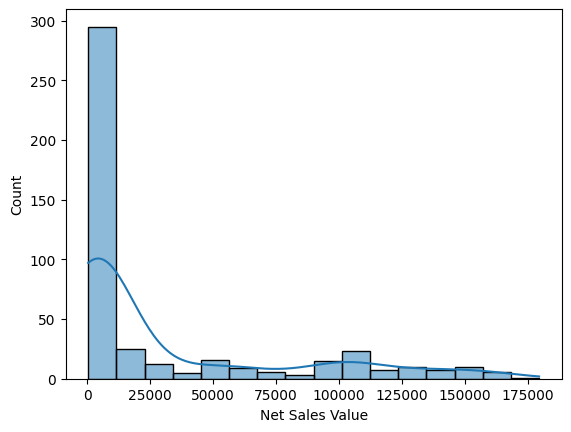

In [44]:
sns.histplot(df['Net Sales Value'],kde=True)

All numerical columns are right skewed, except 'Discount Rate (%)' which is left skewed.

In [45]:
# Boxplots

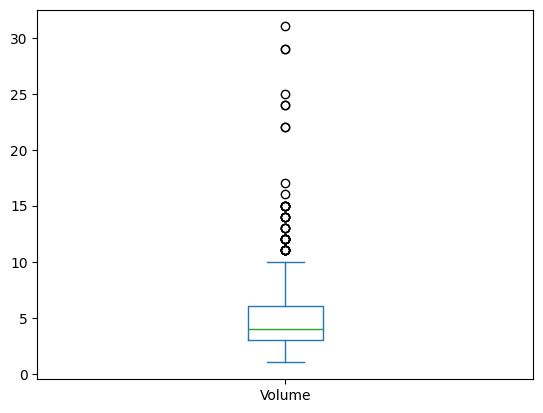

In [46]:
df['Volume'].plot(kind='box')
plt.show()

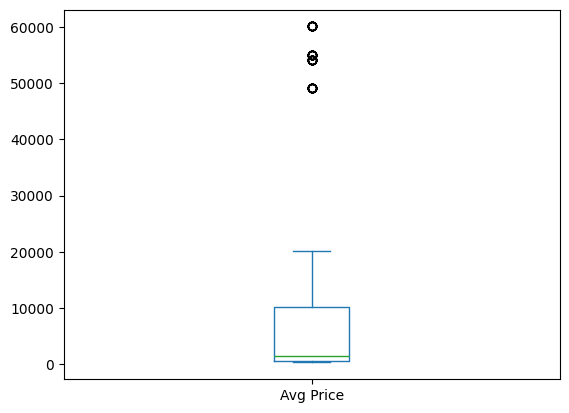

In [47]:
df['Avg Price'].plot(kind='box')
plt.show()

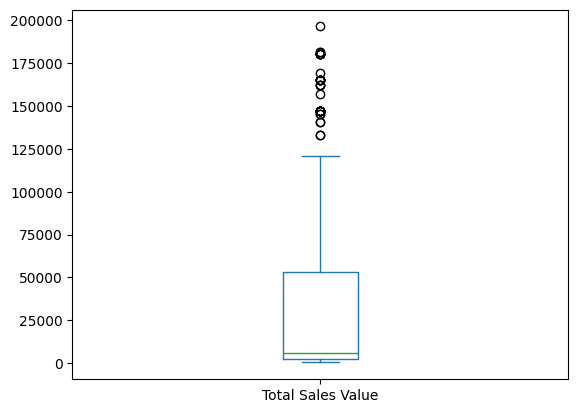

In [48]:
df['Total Sales Value'].plot(kind='box')
plt.show()

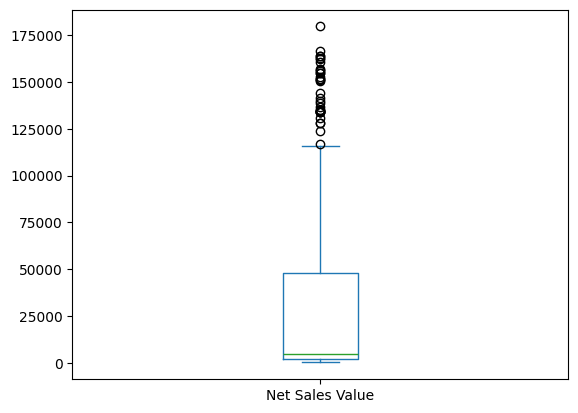

In [49]:
df['Net Sales Value'].plot(kind='box')
plt.show()

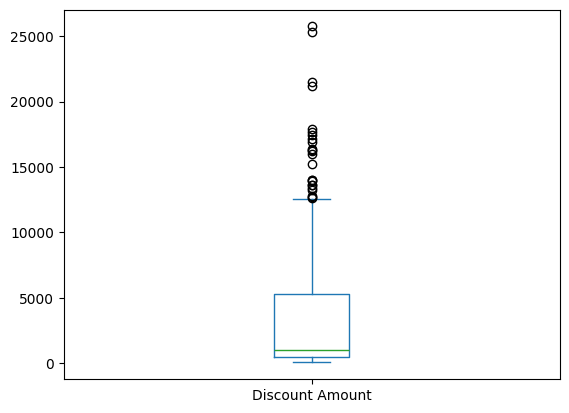

In [50]:
df['Discount Amount'].plot(kind='box')
plt.show()

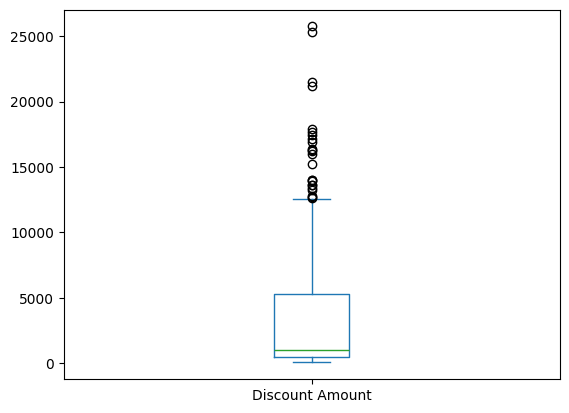

In [51]:
df['Discount Amount'].plot(kind='box')
plt.show()

**Summary**

Using boxplot we can identifying outliers, and understanding the spread of data.

Here all the numerical columns having the outliers

In [52]:
# Bar Charts for Categorical Columns

In [53]:
 (df['Brand']).value_counts()


,count
Brand,
Jeera,90
Gear,60
Viva,60
RealU,45
YouM,45
Babaji,45
Vedic,45
Sumsang,30
Orange,30


<Axes: xlabel='Brand'>

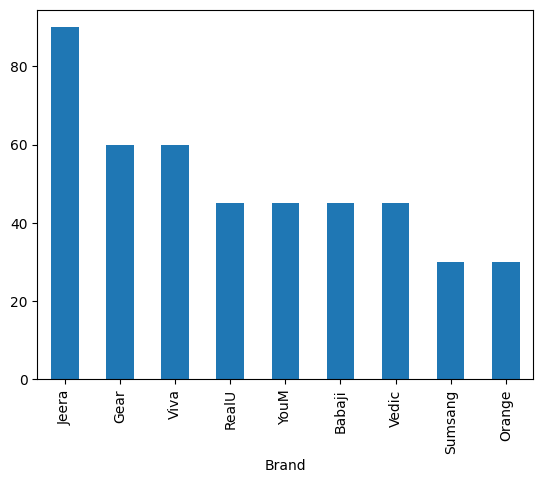

In [54]:
(df['Brand']).value_counts().plot(kind='bar')

In [55]:
(df['BU']).value_counts()


,count
BU,
Mobiles,150
FMCG,150
Lifestyle,150


<Axes: xlabel='BU'>

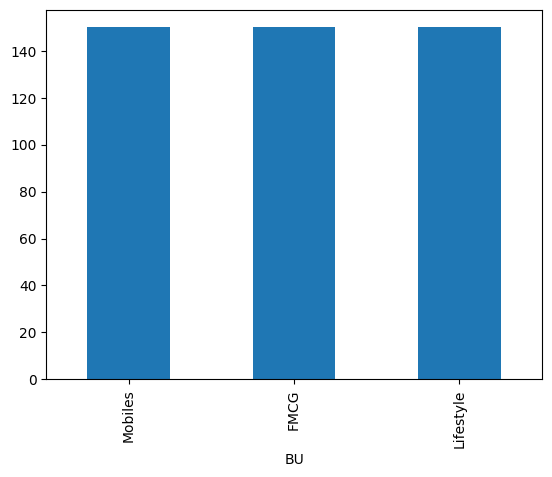

In [56]:
(df['BU']).value_counts().plot(kind='bar')

In [57]:
df['Model'].value_counts()

,count
Model,
RU-10,15
RU-9 Plus,15
M-Formals,15
W-Lounge,15
W-Western,15
M-Casuals,15
M-Jeans,15
W-Inners,15
W-Casuals,15


<Axes: xlabel='Model'>

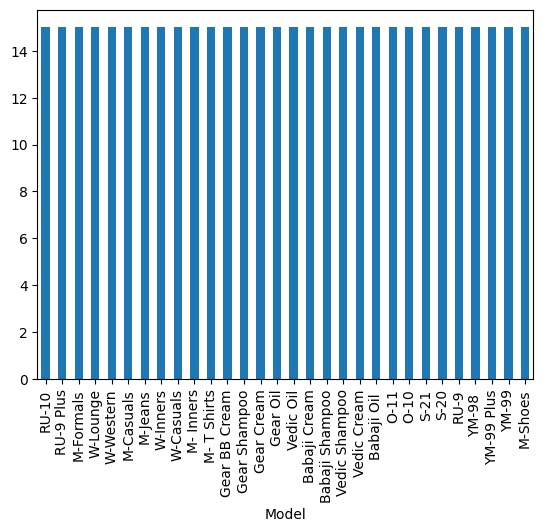

In [58]:
df['Model'].value_counts().plot(kind='bar')

Jeera Brand has maximum sales counts i.e 90

All categories in "BU" & "Model" columns having equal counts.

**Standardization of Numerical Variables**

Standardization (z-score normalization) is a method for rescaling the values that meet the characteristics of the standard normal distribution.

In this method, we will try to reduce the mean to ‘0’ and the standard deviation to ‘1’.

It is much less affected by outliers.

Z-Score will tell us how many standard deviations away a value is from the mean.

Standardizing generally means changing the data's values so that the standard deviation of the data = 1 (called unit variance).

changing the scale (or scaling) won't change the shape of the data's distribution.Hence, it also doesn't change the shape of the data.

formula: z=x-mu/sigma

Where,
mu= mean of the given distribution
sigma = standard deviation of the given distribution


	Standardize the numerical columns using the formula: z=x-mu/sigma
  


In [60]:
from sklearn.preprocessing import StandardScaler
se = StandardScaler()

In [62]:
df1=df.copy()

In [63]:
df1[["Volume","Avg Price","Total Sales Value","Discount Rate (%)","Discount Amount","Net Sales Value"]]=se.fit_transform(df[["Volume","Avg Price","Total Sales Value","Discount Rate (%)","Discount Amount","Net Sales Value"]])

Show before and after comparisons of the data distributions

In [64]:
# Before Standardization of Dataset:
#df.head()
df[["Volume","Avg Price","Total Sales Value","Discount Rate (%)","Discount Amount","Net Sales Value"]]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [65]:
# After Standardization of Dataset:
#df1.head()
df1[["Volume","Avg Price","Total Sales Value","Discount Rate (%)","Discount Amount","Net Sales Value"]]

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.350029,0.091173,2.925721,-0.830289,3.952816,2.804756
1,1.167129,-0.019570,1.330995,-0.852661,1.849014,1.271026
2,0.457388,0.312659,1.562775,-1.351631,1.622995,1.545675
3,0.220808,0.534146,1.719276,-1.949723,1.113807,1.765810
4,-0.488932,-0.130313,-0.188452,0.673739,0.227852,-0.227595
...,...,...,...,...,...,...
445,-0.725512,-0.506840,-0.618334,0.076009,-0.653541,-0.610461
446,0.220808,-0.434857,-0.360801,0.451097,-0.152191,-0.378500
447,-0.725512,-0.490229,-0.606448,0.903793,-0.608140,-0.601921
448,-0.488932,-0.473617,-0.556923,0.388474,-0.530379,-0.555499


<Axes: xlabel='Volume', ylabel='Count'>

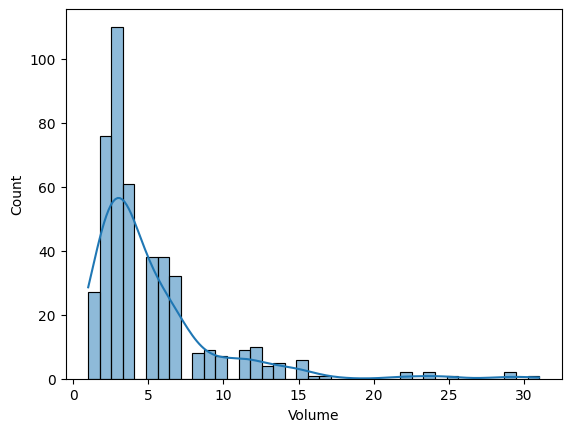

In [66]:
#Before Standardization see the data distribution
sns.histplot(df['Volume'], kde=True)

<Axes: xlabel='Volume', ylabel='Count'>

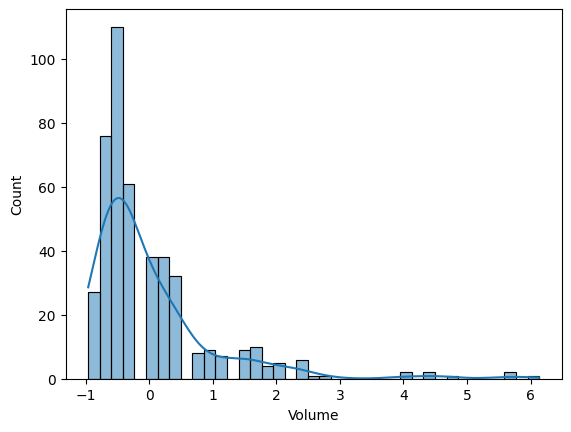

In [67]:
# After Standardization see the Data distribution
sns.histplot(df1['Volume'], kde=True)

**Conversion of Categorical Data into Dummy Variables (one-hot encoding)**

In [68]:
df['BU'].unique()

array(['Mobiles', 'FMCG', 'Lifestyle'], dtype=object)

In [69]:
ohe=pd.get_dummies(df1['BU'],dtype=int)
ohe

,FMCG,Lifestyle,Mobiles
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
445,0,1,0
446,0,1,0
447,0,1,0
448,0,1,0


In [70]:
df['Brand'].unique()

array(['RealU', 'YouM', 'Sumsang', 'Orange', 'Babaji', 'Vedic', 'Gear',
       'Jeera', 'Viva'], dtype=object)

In [71]:
ohe1=pd.get_dummies(df1['Brand'],dtype=int)
ohe1

,Babaji,Gear,Jeera,Orange,RealU,Sumsang,Vedic,Viva,YouM
0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...
445,0,0,1,0,0,0,0,0,0
446,0,0,0,0,0,0,0,1,0
447,0,0,0,0,0,0,0,1,0
448,0,0,1,0,0,0,0,0,0


In [72]:
df['Model'].unique()

array(['RU-10', 'RU-9 Plus', 'YM-99', 'YM-99 Plus', 'YM-98 ', 'RU-9',
       'S-20', 'S-21', 'O-10', 'O-11', 'Babaji Oil ', 'Vedic Cream',
       'Vedic Shampoo', 'Babaji Shampoo', 'Babaji Cream', 'Vedic Oil',
       'Gear Oil', 'Gear Cream', 'Gear Shampoo', 'Gear BB Cream',
       'M- T Shirts', 'M- Inners', 'W-Casuals', 'W-Inners', 'M-Jeans',
       'M-Casuals', 'W-Western', 'W-Lounge', 'M-Formals', 'M-Shoes'],
      dtype=object)

In [73]:
ohe2=pd.get_dummies(df1['Model'],dtype=int)
ohe2

,Babaji Cream,Babaji Oil,Babaji Shampoo,Gear BB Cream,Gear Cream,Gear Oil,Gear Shampoo,M- Inners,M- T Shirts,M-Casuals,...,Vedic Cream,Vedic Oil,Vedic Shampoo,W-Casuals,W-Inners,W-Lounge,W-Western,YM-98,YM-99,YM-99 Plus
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Summary of the descriptive analytics and data visualizations:**

As per EDA done on sales dataset, we found some outliers in dataset also most of the numerical columns are right skewed.
JEERA brand is having highest sales counts.

Data preprocessing is nesessary to remove data errors such as missing values, improve data quality and make the data useful for machine learning purposes